In [1]:
import requests
import xlrd
import numpy as np
import pandas as pd
import holoviews as hv
import datetime
import os
%matplotlib inline
hv.extension('bokeh', 'matplotlib', width="100")

url = 'http://www.econ.yale.edu/~shiller/data/ie_data.xls'
r = requests.get(url)
output = open('ie_data.xls', 'wb')
output.write(r.content)
output.close()
workbook = xlrd.open_workbook('ie_data.xls')
activesheet = workbook.sheet_by_name('Data')
data = pd.read_excel(os.getcwd()+'/ie_data.xls','Data',skiprows=7)
data = data.dropna(axis=0, subset = ['Date'])
data['Date'] = data.apply(lambda x: datetime.datetime.strptime(str(x[0]),"%Y.%m"),axis=1)

Unexpected plot option 'height' for Curve in loaded backend 'matplotlib'.

Possible keywords in the currently active 'matplotlib' renderer are: ['apply_extents', 'apply_ranges', 'apply_ticks', 'aspect', 'autotick', 'bgcolor', 'fig_alpha', 'fig_bounds', 'fig_inches', 'fig_latex', 'fig_rcparams', 'fig_size', 'final_hooks', 'finalize_hooks', 'fontsize', 'initial_hooks', 'interpolation', 'invert_axes', 'invert_xaxis', 'invert_yaxis', 'invert_zaxis', 'labelled', 'logx', 'logy', 'logz', 'normalize', 'projection', 'relative_labels', 'show_frame', 'show_grid', 'show_legend', 'show_title', 'sublabel_format', 'sublabel_position', 'sublabel_size', 'title_format', 'xaxis', 'xrotation', 'xticks', 'yaxis', 'yrotation', 'yticks', 'zaxis', 'zrotation', 'zticks']

If you believe this keyword is correct, please make sure the backend has been imported or loaded with the hv.extension.

OSError: [Errno 22] Invalid argument

:Curve   [Date]   (CAPE)

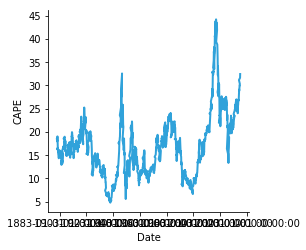

In [2]:
%opts Curve [width=600 height=400 tools=['hover'] ] {+framewise} VLine (color="yellow")

df = data[['Date','CAPE']]
hv.Curve(df) #can only plot one variable at a time with hv at the moment

In [3]:
df.tail()

,Date,CAPE
1759,2017-08-01,29.986307
1760,2017-09-01,30.315082
1761,2017-01-01,31.150018
1762,2017-11-01,31.625329
1763,2017-12-01,32.441556


OSError: [Errno 22] Invalid argument

:Curve   [Date]   (CAPE)

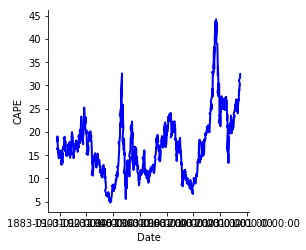

In [4]:
%opts Curve [bgcolor='white'] (color='blue')
hv.Curve(df)

# Plotting interest rates versus CAPE using matplotlib 

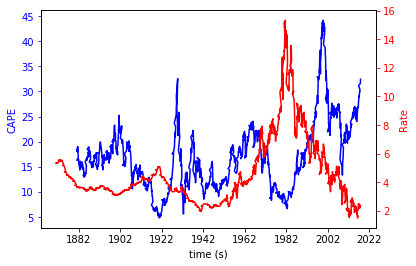

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

fig = plt.figure(figsize=(8, 6))

x_values = data.Date
cape = data.CAPE
ax1.plot(x_values, cape, 'b-')
ax1.set_xlabel('time (s)')
# # Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('CAPE', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
rate = data['Rate GS10']
ax2.plot(x_values, rate, 'r')
ax2.set_ylabel('Rate', color='r')
ax2.tick_params('y', colors='r')

In [6]:
#%output filename ='CAPE'

# Predicting correlation coefficient using [x] model between x and y, where:
# x = Interest Rates
# y = CAPE Ratio

In [7]:
from statsmodels.formula.api import ols

ModuleNotFoundError: No module named 'statsmodels'

In [8]:
data = data.rename(columns = {'Rate GS10': 'Rate'}).set_index('Date')

In [9]:
data['Rate'] = data['Rate'].astype('float')

In [10]:
data = data.loc['1980-01-01':,:]

In [11]:
data.head()

,P,D,E,CPI,Fraction,Rate,Price,Dividend,Earnings,CAPE
Date,,,,,,,,,,
1980-01-01,110.9,5.70000,15.0033,77.8,1980.041667,10.80,351.438964,18.063139,47.545033,8.850934
1980-02-01,115.3,5.75000,15.1467,78.9,1980.125000,12.41,360.288388,17.967548,47.330270,9.054476
1980-03-01,104.7,5.80000,15.2900,80.1,1980.208333,12.75,322.264247,17.852270,47.062276,8.081151
1980-04-01,103,5.84667,15.1733,81,1980.291667,11.47,313.509111,17.795964,46.184153,7.844025
1980-05-01,107.7,5.89333,15.0567,81.8,1980.375000,10.18,324.608853,17.762554,45.381041,8.104226


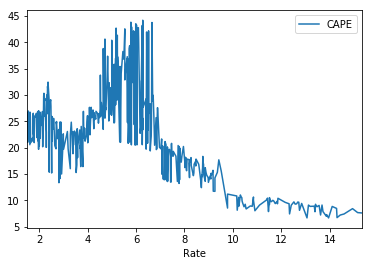

In [12]:
rawdata = data.loc[:,['Rate','CAPE']]
rawdata.sort_values('Rate').plot('Rate','CAPE')

In [ ]:
# logdata = np.log(rawdata[['Rate','CAPE']]).diff().dropna()
# logdata.head()
# logdata.sort_values('Rate').plot('Rate','CAPE')

# #logdata.set_index('Rate').sort_index().plot()

# model = ols("CAPE ~ Rate", logdata).fit()
# model.summary()

In [ ]:
#dir(model)

In [ ]:
#model.predict(exog = rawdata['Rate GS10'])

In [ ]:
logdata.head(2)

In [ ]:
data.to_csv('data.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [ ]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)

In [ ]:
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata)

In [ ]:
curve_fit(func, xdata, ydata)

In [ ]:
popt

In [ ]:
plt.plot(xdata, func(xdata, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

#  Using the above to create a curve optimizer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
# def func(rate, k, n):
#     return k*n**rate

def func(rate, k):
     return k*rate**-1

In [14]:
rawdata.tail()

,Rate,CAPE
Date,,
2017-08-01,2.21,29.986307
2017-09-01,2.20,30.315082
2017-01-01,2.36,31.150018
2017-11-01,2.35,31.625329
2017-12-01,2.37,32.441556


In [ ]:
popt, pcov = curve_fit(func, rawdata.Rate, rawdata.CAPE)

In [ ]:
print("Estimated Parameter:\n\nk=%s\n" %(popt[0]))

In [ ]:
#plt.plot(rate, func(rate, *popt), 'r-',label='fit: k=-%0.003f,n=%0.00096f' % tuple(popt))
plt.plot(rawdata.Rate, func(rawdata.Rate, *popt), 'r-',label='fit: k=-%0.003f' % popt)

In [ ]:
"""
The logdata showed unwanted behaviour so we will deal with rawdata
"""

# rate = np.array(logdata.Rate)
# cape = np.array(logdata.CAPE)
# popt, pcov = curve_fit(func, rate, cape)

# print("Estimated Parameter:\n    k=%s\n    n=%s " %(popt[0],popt[1]))

# def func(rate, k, n):
#     return k*n**rate

# logdata.tail()

# Autofill kind of thing with random Rate values till 2020 and predicting CAPE using func with the estimated params ???

In [ ]:
rawdata.tail()

In [15]:
import random

from datetime import datetime, timedelta
from collections import OrderedDict
dates = ["2018-01-01", "2023-01-01"]
start, end = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
dates = OrderedDict(((start + timedelta(date)).strftime("%Y-%m-01"), None) for date in range((end - start).days)).keys()

dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]

df = pd.DataFrame(np.sort(np.random.uniform(low=2.37, high=4.5, size=len(dates))), index=dates, columns=['Rate'])

df['CAPE'] = df.apply(lambda x: func(x,77.7255869375), axis=1)

In [16]:
rawdata.head()

,Rate,CAPE
Date,,
1980-01-01,10.80,8.850934
1980-02-01,12.41,9.054476
1980-03-01,12.75,8.081151
1980-04-01,11.47,7.844025
1980-05-01,10.18,8.104226


In [ ]:
regressed_data = rawdata.append(df)

In [ ]:
# regressed_data .CAPE.plot()
# regressed_data .Rate.plot(secondary_y=True, figsize=(9,9))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

plt.rcParams["figure.figsize"] = (9,6)

#plt.figure(figsize=(10, 20))

x_values = rawdata.index
cape = rawdata.CAPE
ax1.plot(x_values, cape, 'b-')
ax1.set_xlabel('time (s)')
# # Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('CAPE', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
rate = rawdata['Rate']
ax2.plot(x_values, rate, 'r')
ax2.set_ylabel('Rate', color='r')
ax2.tick_params('y', colors='r')

In [ ]:
from bokeh.models import DatetimeTickFormatter

In [ ]:
from bokeh.plotting import figure, output_file, show

#output_file("line.html")

p = figure(plot_width=600, plot_height=400)

# add a line renderer
p.line(rawdata.index, rawdata.CAPE, line_width=2)
p.xaxis.formatter=DatetimeTickFormatter(years=["%Y-%m"])
show(p)

# Using Bokeh to plot data

In [17]:
import random
from datetime import datetime, timedelta
from collections import OrderedDict
dates = ["2018-01-01", "2023-01-01"]
start, end = [datetime.strptime(date, "%Y-%m-%d") for date in dates]
dates = OrderedDict(((start + timedelta(date)).strftime("%Y-%m-01"), None) for date in range((end - start).days)).keys()

dates = [datetime.strptime(date, "%Y-%m-%d") for date in dates]

df = pd.DataFrame(np.sort(np.random.uniform(low=2.37, high=4.5, size=len(dates))), index=dates, columns=['Rate'])

df['CAPE'] = df.apply(lambda x: func(x,77.7255869375), axis=1)

In [18]:
from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import Select
from bokeh.plotting import figure

In [ ]:
"""
there are duplicate indices???? check that out
"""

In [20]:
rawdata.head()

,Rate,CAPE
Date,,
1980-01-01,10.80,8.850934
1980-02-01,12.41,9.054476
1980-03-01,12.75,8.081151
1980-04-01,11.47,7.844025
1980-05-01,10.18,8.104226


In [45]:
regressed_data = rawdata.append(df)

In [46]:
regressed_data = regressed_data.loc[~regressed_data.index.duplicated(keep='first')].rename(columns = {'Rate': 'rRate','CAPE': 'rCAPE'})

In [50]:
regressed_data.index.name = 'Date'

In [51]:
regressed_data.head()

,rRate,rCAPE
Date,,
1980-01-01,10.80,8.850934
1980-02-01,12.41,9.054476
1980-03-01,12.75,8.081151
1980-04-01,11.47,7.844025
1980-05-01,10.18,8.104226


In [52]:
rawdata = rawdata.loc[~rawdata.index.duplicated(keep='first')]

In [53]:
total = pd.concat([regressed_data,rawdata],axis=1)

In [55]:
total.to_csv('total.csv')

# Need to run from here

In [57]:
total = pd.read_csv('total.csv', index_col = 'Date')

In [58]:
datasource = ColumnDataSource(total)

In [59]:
plot = figure(title="Correlation Plot", plot_width=500, plot_height=500)
plot.circle("Rate", "CAPE", size=2, source=datasource)
plot.title.text_font_size = "25px"
plot.title.align = "center"

In [ ]:
STRATEGIES = ['Rate', 'CAPE', 'rRate', 'rCAPE']
ticker1 = Select(value=get, options=STRATEGIES)
ticker2 = Select(value="CAPE", options=STRATEGIES)

# Define the layout
layout = row(column(ticker1, ticker2), plot)

curdoc().add_root(layout)
curdoc().title = "Stock Correlations"

In [ ]:
from bokeh.io import output_notebook

In [ ]:
# def get_rsq(f, y, popt):

#     ss_res = np.dot((y - func(rate, *popt)),(y - func(rate, *popt)))
#     ymean = np.mean(y)
#     ss_tot = np.dot((y-ymean),(y-ymean))
#     return 1-ss_res/ss_tot

# print("Mean R:",  get_rsq(func, cape, popt))

# logdata.sort_values('CAPE').head(1)

# logdata1 = logdata.drop(['2008-01-01']) #dropping an outlier and testing the impact on R2

# #logdata1.loc['2008-01-01',:] # worked?

# #logdata1 = logdata.set_index('Rate')
# rate = np.array(logdata1.Rate)
# cape = np.array(logdata1.CAPE)

# popt, pcov = curve_fit(func, rate, cape)
# print("Mean R:",  get_rsq(func, cape, popt)) # removing the lowest value in CAPE has increased R2 from 0.00175 to 0.0021

"""
Ok so apparently R squared is not meaningful for nonlinear models therefore no further research is needed on this part
"""